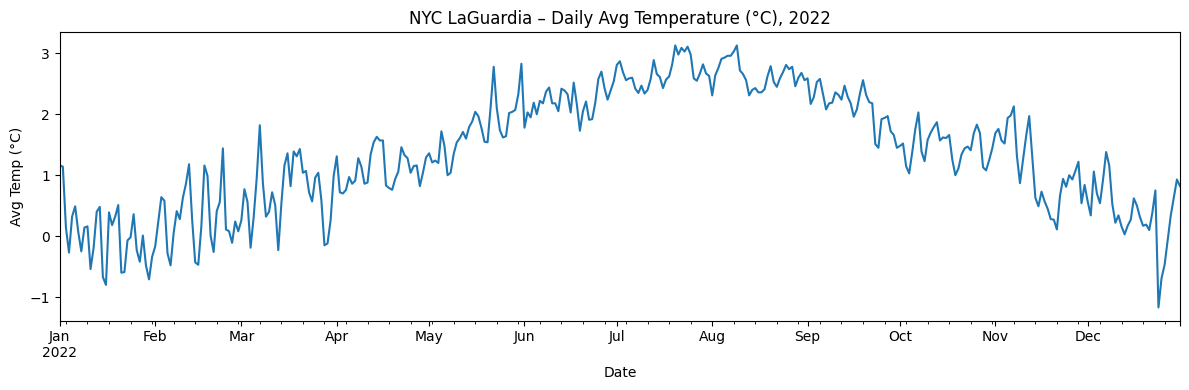

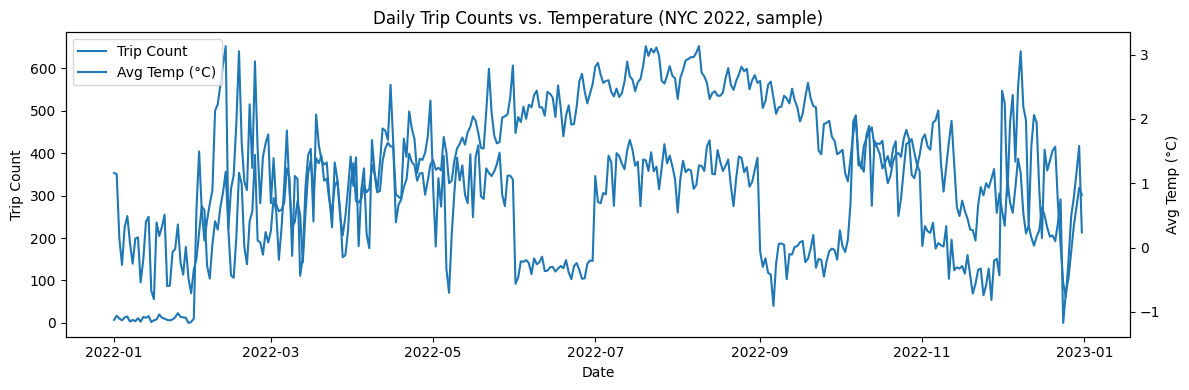

Rows in weather: 365 | Days in df_daily: 365 | Distinct trip dates in sample: 365


In [1]:
# Exercise 2.3 – Matplotlib basics (temps time series + trips vs. temp dual axis)
import os, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

# --------- Paths (auto-detect project root) ----------
CWD = Path.cwd().resolve()
PROJECT = CWD if (CWD/"Output").exists() else (CWD.parent if (CWD.parent/"Output").exists() else CWD)
OUT = PROJECT/"Output"
weather_csv = OUT/"laguardia_weather_2022.csv"
merged_sample = OUT/"citibike_weather_2022_sample_100k.csv"  # commit-friendly sample from 2.2

# --------- Load data ----------
# Weather (daily average temp in °C)
assert weather_csv.exists(), f"Missing {weather_csv}. Re-run your weather export step."
dfw = pd.read_csv(weather_csv, parse_dates=["date"]).sort_values("date")

# Merged sample (has one row per trip + avgTemp column)
if merged_sample.exists():
    dft = pd.read_csv(merged_sample, parse_dates=["started_at"])
    # ensure date is datetime (not just string)
    dft["date"] = pd.to_datetime(dft["date"])
else:
    raise FileNotFoundError(f"Missing {merged_sample}. Push your 100k sample from Exercise 2.2.")

# --------- 3) Time series: temperature over 2022 (pandas plotting -> matplotlib) ----------
ax = dfw.set_index("date")["avgTemp"].plot(figsize=(12,4), title="NYC LaGuardia – Daily Avg Temperature (°C), 2022")
ax.set_xlabel("Date")
ax.set_ylabel("Avg Temp (°C)")
plt.tight_layout()
plt.show()

# --------- 4) Daily trip counts & merge with weather ----------
daily_trips = dft.groupby("date").size().rename("trip_count").reset_index()
df_daily = dfw.merge(daily_trips, on="date", how="left").fillna({"trip_count": 0})
df_daily["trip_count"] = df_daily["trip_count"].astype("int64")

# --------- 5) Dual-axis line chart: trips (left) vs temperature (right) ----------
fig, ax1 = plt.subplots(figsize=(12,4))
line1, = ax1.plot(df_daily["date"], df_daily["trip_count"], label="Trip Count")
ax1.set_xlabel("Date")
ax1.set_ylabel("Trip Count")
ax2 = ax1.twinx()
line2, = ax2.plot(df_daily["date"], df_daily["avgTemp"], label="Avg Temp (°C)")
ax2.set_ylabel("Avg Temp (°C)")

# one legend for both lines
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left")

plt.title("Daily Trip Counts vs. Temperature (NYC 2022, sample)")
plt.tight_layout()
plt.show()

print("Rows in weather:", len(dfw), "| Days in df_daily:", len(df_daily), "| Distinct trip dates in sample:", daily_trips['date'].nunique())


## How I used Matplotlib (Exercise 2.3)

**Data prep.** I read daily average temperature for LaGuardia (`laguardia_weather_2022.csv`) and the merged trips sample (`citibike_weather_2022_sample_100k.csv`). I computed **daily trip counts** with:
- `groupby("date").size()` → `trip_count`
- Merged with weather on `date`
- Filled missing counts with 0 and cast to `int64`

**Plot 1 (temperature time series).** I used a **pandas convenience plot**:
```python
dfw.set_index("date")["avgTemp"].plot(...)


In [2]:
df_daily = dfw.merge(daily_trips, on="date", how="left").fillna({"trip_count": 0})
df_daily["trip_count"] = df_daily["trip_count"].astype("int64")


Text(0, 0.5, 'Avg Temp (°C)')

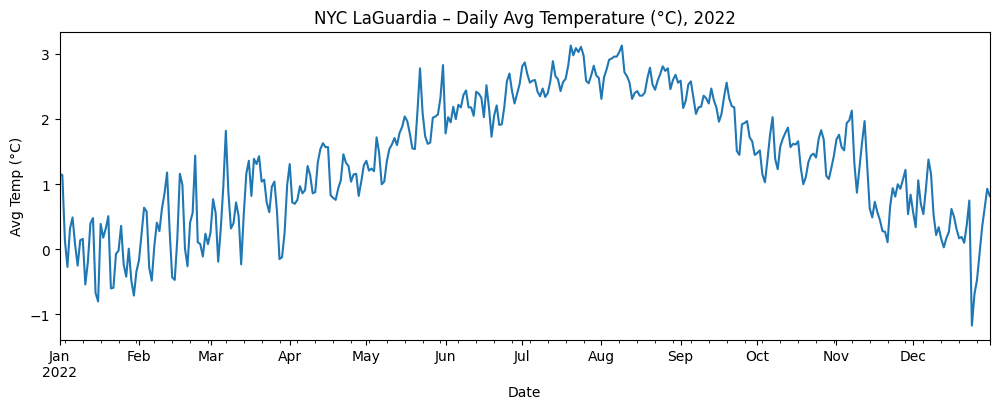

In [3]:
ax = dfw.set_index("date")["avgTemp"].plot(figsize=(12,4), title="NYC LaGuardia – Daily Avg Temperature (°C), 2022")
ax.set_xlabel("Date")
ax.set_ylabel("Avg Temp (°C)")


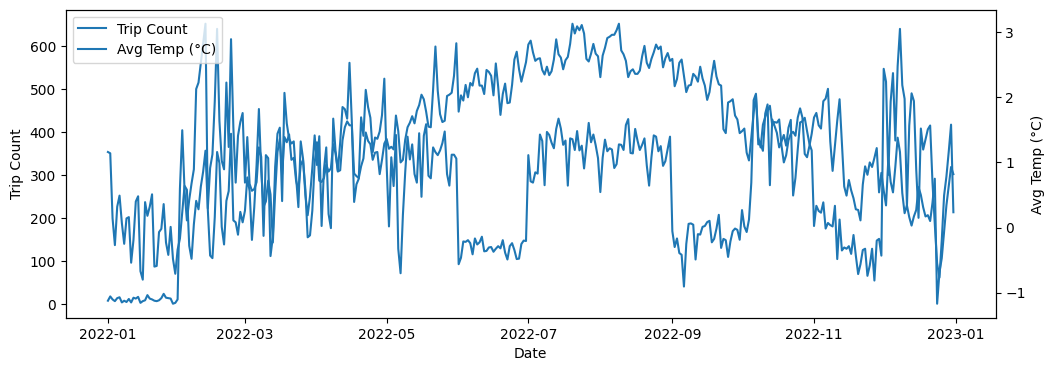

In [4]:
fig, ax1 = plt.subplots(figsize=(12,4))
line1, = ax1.plot(df_daily["date"], df_daily["trip_count"], label="Trip Count")
ax1.set_xlabel("Date")
ax1.set_ylabel("Trip Count")

ax2 = ax1.twinx()
line2, = ax2.plot(df_daily["date"], df_daily["avgTemp"], label="Avg Temp (°C)")
ax2.set_ylabel("Avg Temp (°C)")

ax1.legend([line1, line2], ["Trip Count", "Avg Temp (°C)"], loc="upper left")
